# Construção, Treinamento e Avaliação de uma Rede Neural Convolucional (CNN) com Keras

Este notebook apresenta um passo a passo detalhado para construir, treinar e avaliar uma Rede Neural Convolucional (CNN) utilizando um dataset de imagens. O objetivo é fornecer uma compreensão profunda de cada etapa envolvida no desenvolvimento de modelos de deep learning para classificação de imagens.

## 1. Importação das Bibliotecas Necessárias

Nesta seção, vamos importar todas as bibliotecas essenciais para manipulação de dados, visualização e construção de modelos de deep learning.

- **numpy**: Biblioteca fundamental para operações matemáticas e manipulação de arrays.
- **matplotlib.pyplot**: Utilizada para visualização de imagens e gráficos.
- **tensorflow** e **keras**: Frameworks para construção, treinamento e avaliação de redes neurais profundas. O Keras, integrado ao TensorFlow, fornece uma API de alto nível para definição de modelos.

In [1]:
# Importação das bibliotecas essenciais
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models

2025-06-06 10:30:36.948051: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-06-06 10:30:37.079224: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1749216637.150024 1397670 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1749216637.164625 1397670 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1749216637.254862 1397670 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking 

## 2. Carregamento e Pré-processamento dos Dados

Vamos utilizar o dataset MNIST, que contém imagens de dígitos manuscritos (0 a 9). O Keras já disponibiliza esse dataset, facilitando o carregamento.

### Etapas:
- **Carregamento dos dados**: Separação em conjuntos de treino e teste.
- **Normalização**: Os valores dos pixels são convertidos para o intervalo [0, 1], o que acelera e estabiliza o treinamento.
- **Conversão dos rótulos**: Os rótulos são convertidos para o formato one-hot encoding, necessário para classificação multiclasse.
- **Visualização**: Exibição de algumas imagens do dataset para entender o formato dos dados.

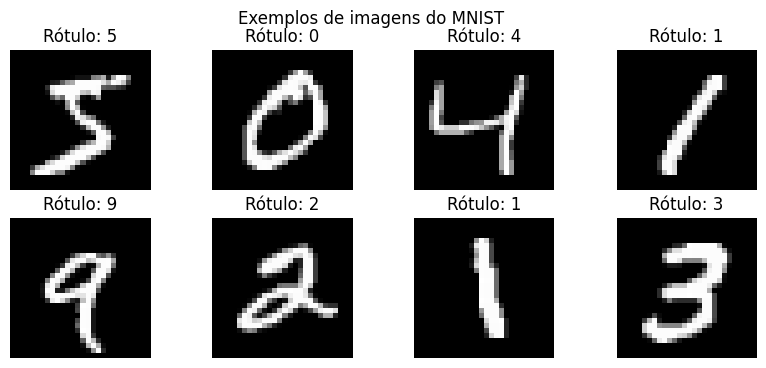

In [2]:
# Carregando o dataset MNIST
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

# Normalizando os valores dos pixels para o intervalo [0, 1]
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# Expandindo a dimensão para incluir o canal (necessário para CNNs)
X_train = np.expand_dims(X_train, -1)
X_test = np.expand_dims(X_test, -1)

# Convertendo os rótulos para one-hot encoding
num_classes = 10
y_train_cat = keras.utils.to_categorical(y_train, num_classes)
y_test_cat = keras.utils.to_categorical(y_test, num_classes)

# Exibindo algumas imagens do dataset
plt.figure(figsize=(10,4))
for i in range(8):
    plt.subplot(2, 4, i+1)
    plt.imshow(X_train[i].reshape(28,28), cmap='gray')
    plt.title(f"Rótulo: {y_train[i]}")
    plt.axis('off')
plt.suptitle("Exemplos de imagens do MNIST")
plt.show()

## 3. Construção do Modelo de Rede Neural Convolucional (CNN)

A seguir, vamos construir a arquitetura da CNN utilizando a API Sequential do Keras.

### Principais componentes:
- **Camadas Convolucionais (`Conv2D`)**: Extraem características locais das imagens usando filtros (kernels).
- **Camadas de Pooling (`MaxPooling2D`)**: Reduzem a dimensionalidade, mantendo as informações mais relevantes.
- **Camada Flatten**: Transforma o mapa de características 2D em um vetor 1D para entrada nas camadas densas.
- **Camadas Densas (`Dense`)**: Realizam a classificação com base nas características extraídas.
- **Funções de ativação**: `relu` para não-linearidade e `softmax` para saída de probabilidades.

Cada camada é parametrizada por número de filtros, tamanho do kernel, função de ativação, etc.

In [3]:
# Definindo a arquitetura da CNN
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])

# Exibindo o resumo da arquitetura
model.summary()

/home/lucas/Study/projects/IA-Studies/venv/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-06-06 10:30:40.706186: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │       102,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 121,930 (476.29 KB)

 Trainable params: 121,930 (476.29 KB)

 Non-trainable params: 0 (0.00 B)

## 4. Compilação e Treinamento do Modelo

Antes de treinar, precisamos compilar o modelo, especificando:

- **Otimizador**: Algoritmo que ajusta os pesos da rede (ex: Adam).
- **Função de perda**: Mede o erro entre as previsões e os rótulos reais (ex: categorical_crossentropy).
- **Métricas**: Critérios para avaliar o desempenho (ex: accuracy).

O treinamento é realizado com o método `fit`, onde definimos o número de épocas, tamanho do batch e a validação em cada época.

In [ ]:
# Compilando o modelo
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Treinando o modelo
history = model.fit(
    X_train, y_train_cat,
    epochs=10,
    batch_size=128,
    validation_split=0.1,
    verbose=2
)

Epoch 1/10
422/422 - 10s - 24ms/step - accuracy: 0.9239 - loss: 0.2568 - val_accuracy: 0.9745 - val_loss: 0.0848
Epoch 2/10
422/422 - 10s - 25ms/step - accuracy: 0.9779 - loss: 0.0709 - val_accuracy: 0.9862 - val_loss: 0.0474
Epoch 3/10


## 5. Avaliação do Modelo

Após o treinamento, avaliamos o desempenho do modelo no conjunto de teste.

- **Loss (Perda)**: Indica o quão distante as previsões estão dos valores reais.
- **Accuracy (Acurácia)**: Proporção de previsões corretas.

É importante analisar se há overfitting (modelo vai muito bem no treino, mas mal no teste) ou underfitting (modelo não aprende bem nem no treino).

In [ ]:
# Avaliando o modelo no conjunto de teste
test_loss, test_acc = model.evaluate(X_test, y_test_cat, verbose=0)
print(f"Acurácia no conjunto de teste: {test_acc:.4f}")
print(f"Perda no conjunto de teste: {test_loss:.4f}")

## 6. Visualização dos Resultados

Vamos visualizar a evolução da acurácia e da perda durante o treinamento e validação.

- **Curva de Acurácia**: Mostra como a precisão evolui ao longo das épocas.
- **Curva de Perda**: Mostra como o erro diminui (ou não) durante o treinamento.

Esses gráficos ajudam a identificar problemas como overfitting (quando a acurácia de validação para de melhorar ou piora enquanto a de treino continua subindo).

In [ ]:
# Plotando as curvas de acurácia e perda
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Treinamento')
plt.plot(history.history['val_accuracy'], label='Validação')
plt.title('Acurácia durante o treinamento')
plt.xlabel('Época')
plt.ylabel('Acurácia')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Treinamento')
plt.plot(history.history['val_loss'], label='Validação')
plt.title('Perda durante o treinamento')
plt.xlabel('Época')
plt.ylabel('Perda')
plt.legend()

plt.tight_layout()
plt.show()

## 7. Realizando Previsões com Novos Dados

Agora, vamos utilizar o modelo treinado para fazer previsões em novas imagens.

### Passos:
- **Selecionar uma imagem do conjunto de teste**.
- **Processar a imagem**: Garantir que está no formato correto.
- **Realizar a predição**: O modelo retorna as probabilidades para cada classe.
- **Interpretar o resultado**: Exibir a imagem, a classe prevista e as probabilidades.

Vamos mostrar exemplos práticos:

In [ ]:
# Selecionando algumas imagens do conjunto de teste
num_examples = 5
indices = np.random.choice(len(X_test), num_examples, replace=False)
images = X_test[indices]
labels = y_test[indices]

# Fazendo previsões
predictions = model.predict(images)

plt.figure(figsize=(12,3))
for i in range(num_examples):
    plt.subplot(1, num_examples, i+1)
    plt.imshow(images[i].reshape(28,28), cmap='gray')
    pred_label = np.argmax(predictions[i])
    true_label = labels[i]
    prob = np.max(predictions[i])
    plt.title(f"Verdadeiro: {true_label}\nPrevisto: {pred_label}\nProb: {prob:.2f}")
    plt.axis('off')
plt.suptitle("Previsões do modelo em novas imagens")
plt.show()

# Conclusão

Neste notebook, percorremos todas as etapas fundamentais para construir, treinar e avaliar uma Rede Neural Convolucional (CNN) para classificação de imagens. Exploramos desde a preparação dos dados até a análise dos resultados, incluindo visualizações e exemplos práticos de predição. Esse fluxo pode ser adaptado para outros datasets e arquiteturas mais complexas, conforme a necessidade do seu projeto.